In [1]:
%pip install numpy pandas seaborn scikit-learn lightgbm
import numpy as np
import pandas as pd
import seaborn as sns
import config as cnf
import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from lightgbm import LGBMClassifier

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
heart = pd.read_csv("datasets/heart.csv")
diabetes = pd.read_csv("datasets/diabetes.csv")
thyroid = pd.read_csv("datasets/throid_disase.csv")

In [ ]:
diabetes.drop(columns=["Unnamed: 0"], axis = 1, inplace = True)

In [ ]:
utils.first_edit(heart)
utils.first_edit(diabetes)
utils.first_edit(thyroid)

########## SHAPE ##########
(303, 14)
########## DTYPES ##########
AGE           int64
SEX           int64
CP            int64
TRESTBPS      int64
CHOL          int64
FBS           int64
RESTECG       int64
THALACH       int64
EXANG         int64
OLDPEAK     float64
SLOPE         int64
CA            int64
THAL          int64
TARGET        int64
dtype: object
########## HEAD ##########
   AGE  SEX  CP  TRESTBPS  CHOL  FBS  RESTECG  THALACH  EXANG  OLDPEAK  SLOPE  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   CA  THAL  TARGET  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2    

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


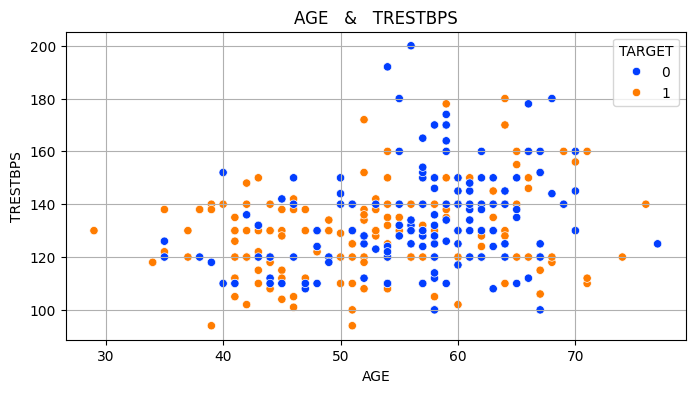

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


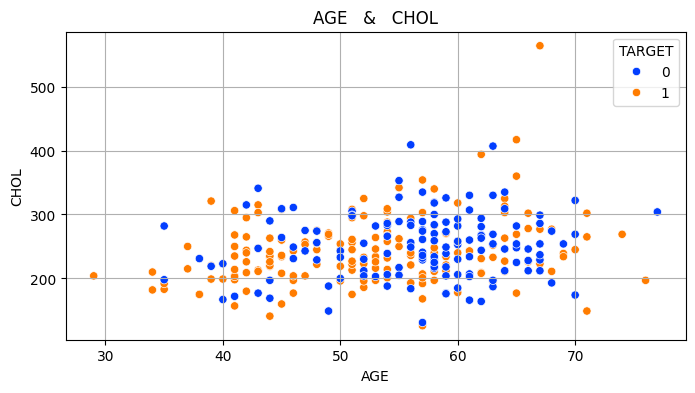

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


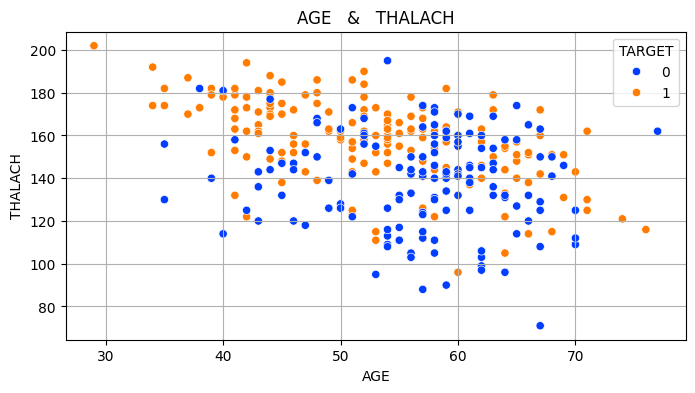

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


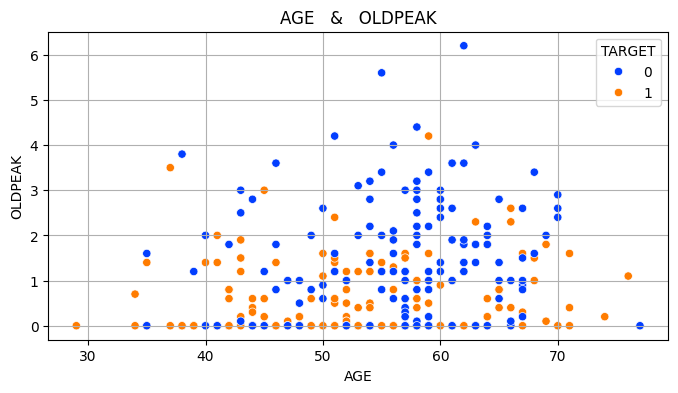

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


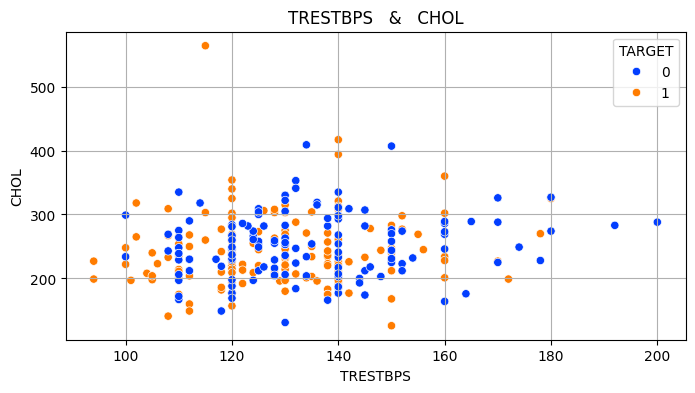

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


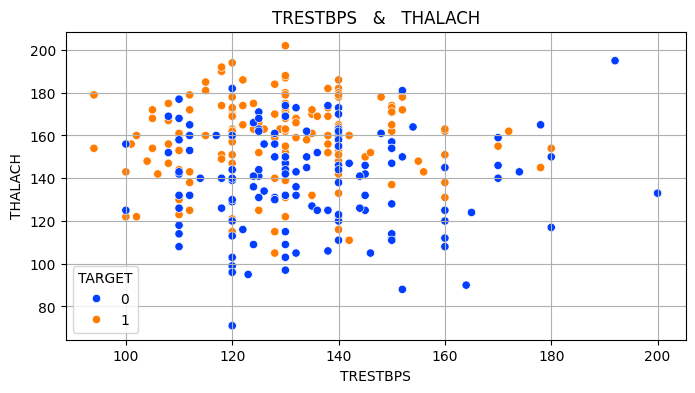

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


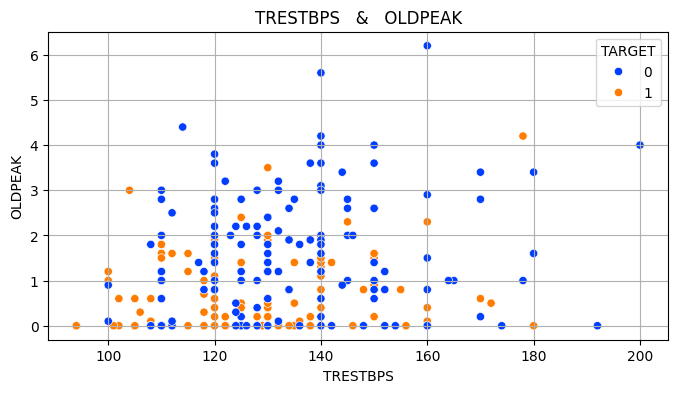

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


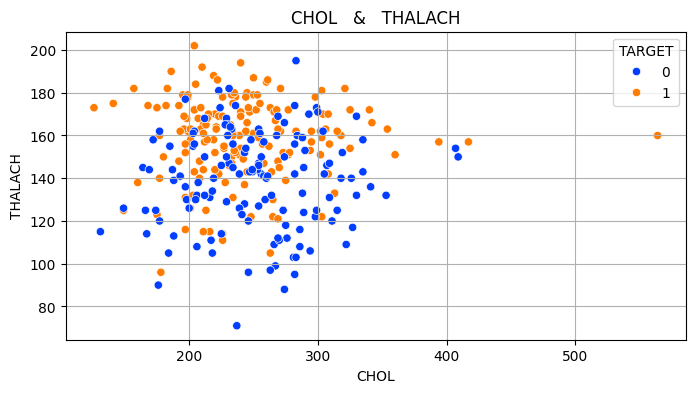

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


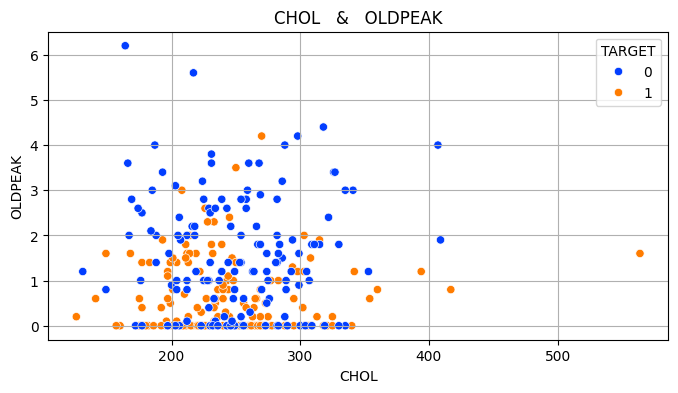

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


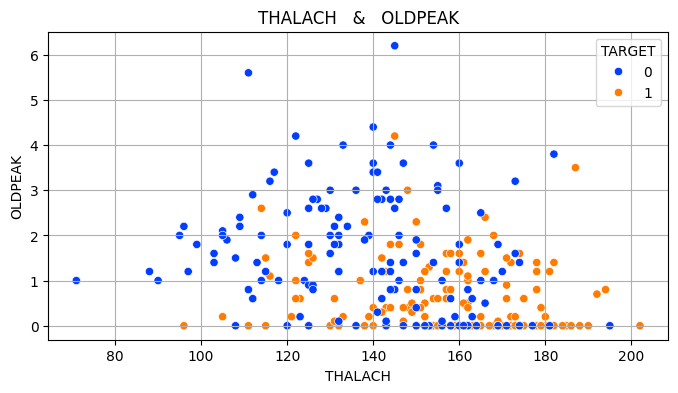

c:\Users\s7522\Desktop\ml_app\utils.py:241: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(x=df[target],
c:\Users\s7522\Desktop\ml_app\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\s7522\Desktop\ml_app\venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\s7522\Desktop\ml_app\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

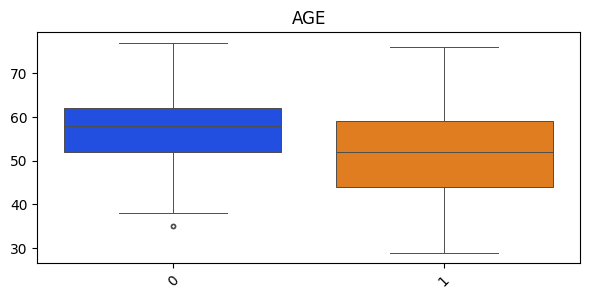

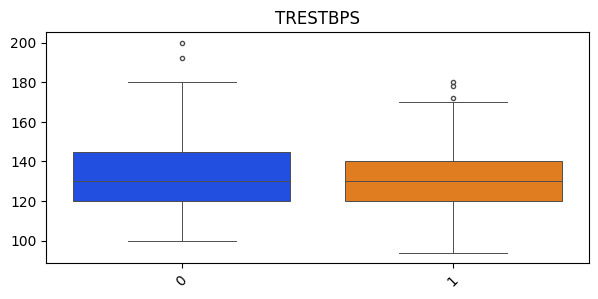

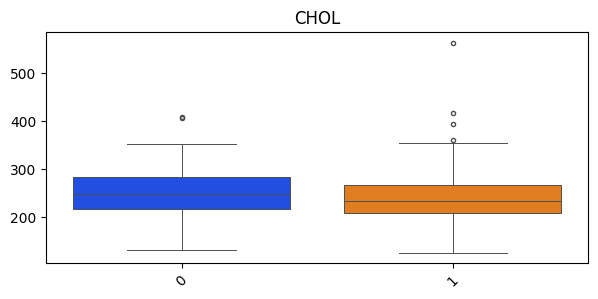

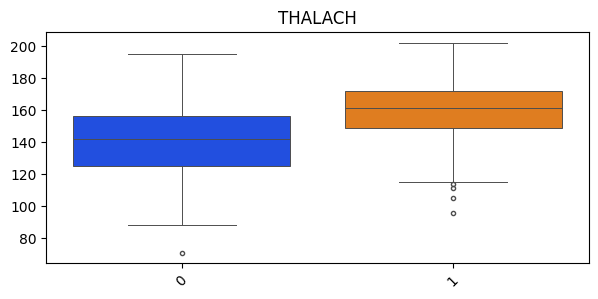

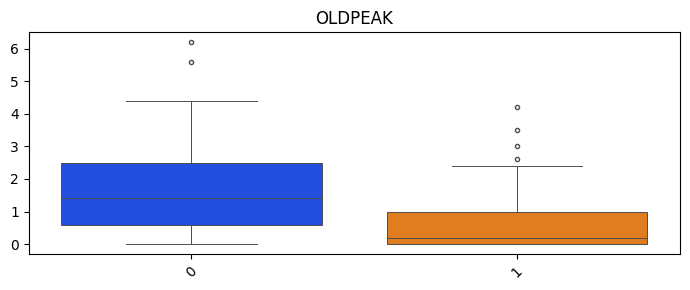

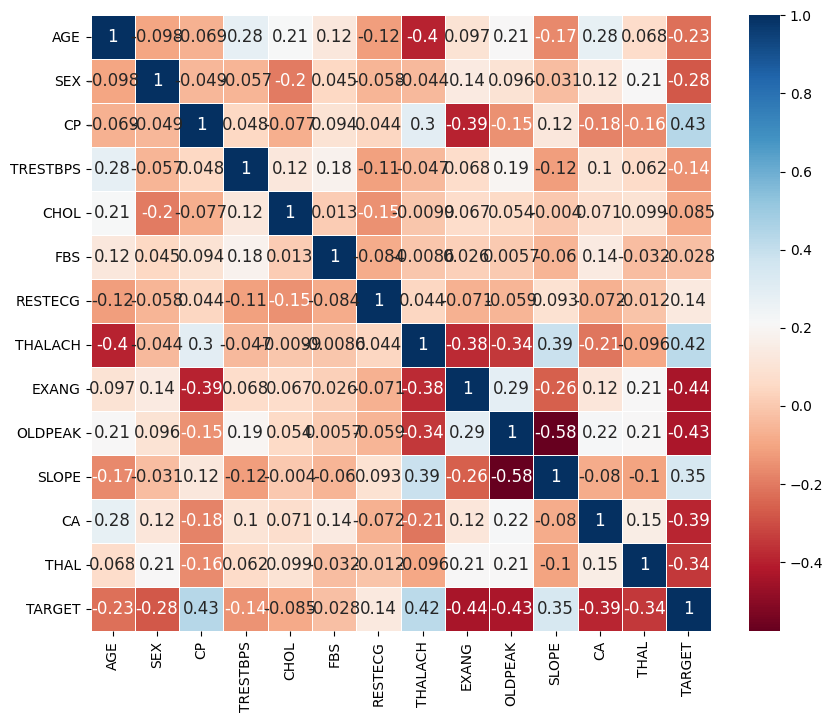

Hyperparameter Optimization....
########## XGBoost ##########
roc_auc (Before): 0.8675
roc_auc (After): 0.8842
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'num_class': 8, 'objective': 'multi:softmax'}

########## LightGBM ##########
roc_auc (Before): 0.863
roc_auc (After): 0.873
LightGBM best params: {'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 500}

[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [ ]:
utils.analyse_dataset(heart)
cat_cols, num_cols = utils.grab_dataset(heart)
print("########## Cat Cols ##########")
print(cat_cols)
print("########## Num Cols ##########")
print(num_cols)
for i in num_cols:
    print(f"{i} cols threshold values : {utils.outlier_thresholds(heart,i)}")
for i in num_cols:
    print(f"{i} cols threshold values : {utils.check_outlier(heart,i)}")
for i in num_cols:
    print(f"{i} cols threshold values : {utils.grab_outliers(heart,i, index = True)}")
for i in num_cols:
    print(f"{i} cols threshold values : {utils.check_outlier(heart,i)}")
for i in num_cols:
    utils.num_summary(heart, i)
utils.numcols_target_corr(heart, num_cols)
utils.numeric_variables_boxplot(heart, num_cols, target = cnf.target )
utils.correlation_matrix(heart, heart.columns)
y = heart['TARGET']
data = heart.drop(columns = ['TARGET'], axis = 1)
X= data
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns = data.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
utils.hyperparameter_optimization(X_train, y_train)
model = LGBMClassifier().fit(X_train, y_train)
pickle.dump(model, open("heart.pkl", "wb"))

########## SHAPE ##########
(253680, 20)
########## DTYPES ##########
HIGHBP                  int64
HIGHCHOL                int64
CHOLCHECK               int64
BMI                     int64
SMOKER                  int64
STROKE                  int64
HEARTDISEASEORATTACK    int64
PHYSACTIVITY            int64
FRUITS                  int64
VEGGIES                 int64
HVYALCOHOLCONSUMP       int64
ANYHEALTHCARE           int64
NODOCBCCOST             int64
GENHLTH                 int64
MENTHLTH                int64
PHYSHLTH                int64
DIFFWALK                int64
SEX                     int64
AGE                     int64
TARGET                  int64
dtype: object
########## HEAD ##########
   HIGHBP  HIGHCHOL  CHOLCHECK  BMI  SMOKER  STROKE  HEARTDISEASEORATTACK  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0       

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


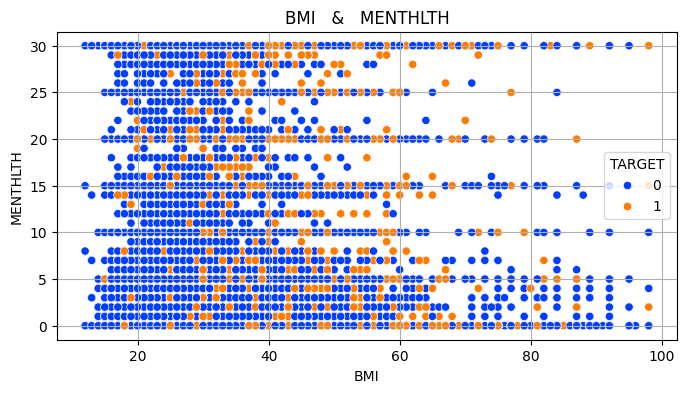

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


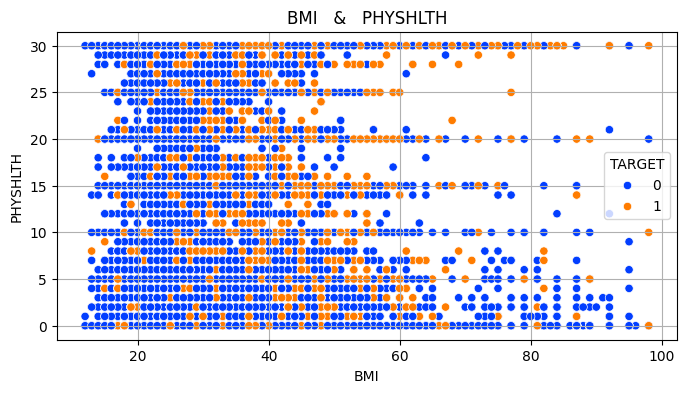

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


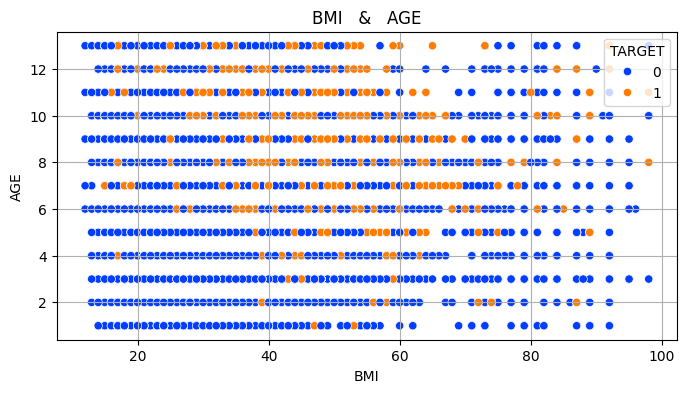

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


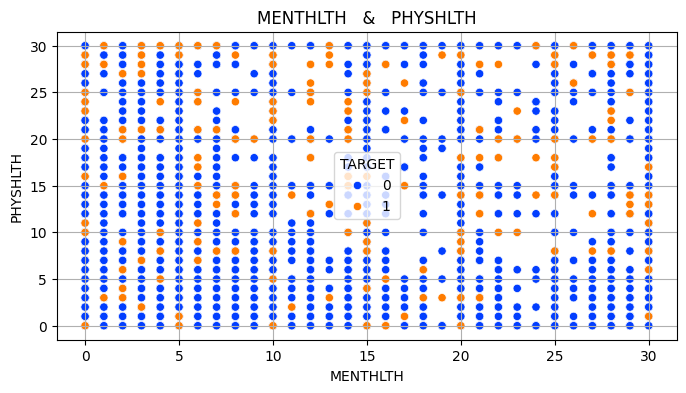

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],


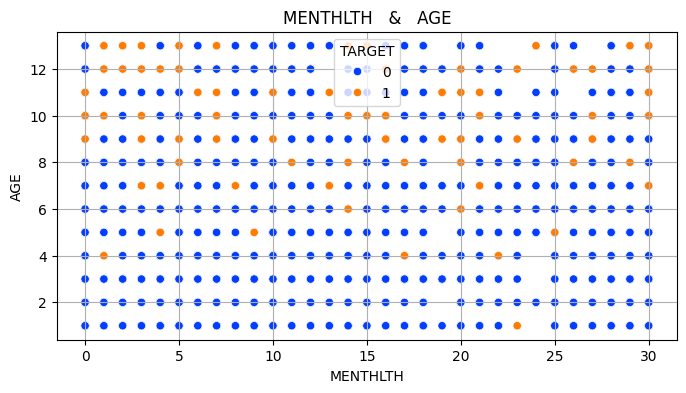

c:\Users\s7522\Desktop\ml_app\utils.py:202: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataframe[item[0]],
c:\Users\s7522\Desktop\ml_app\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


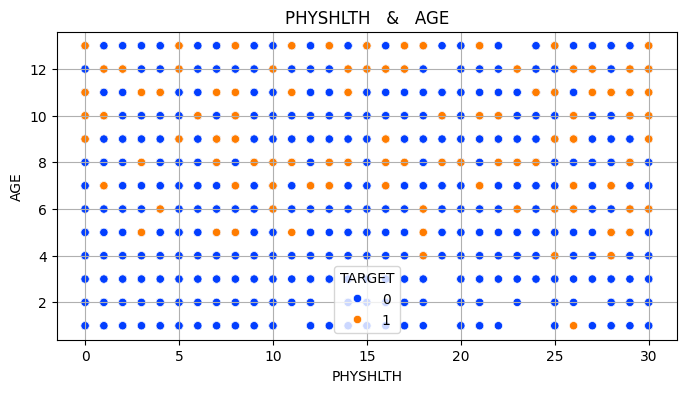

c:\Users\s7522\Desktop\ml_app\utils.py:241: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(x=df[target],
c:\Users\s7522\Desktop\ml_app\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\s7522\Desktop\ml_app\venv\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\s7522\Desktop\ml_app\venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

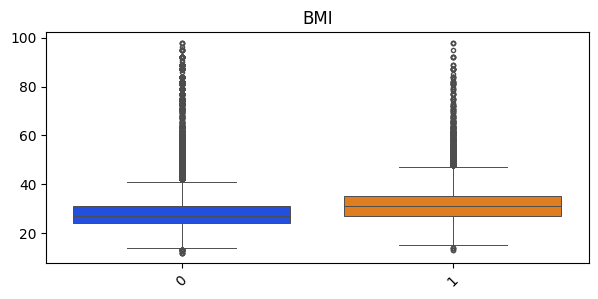

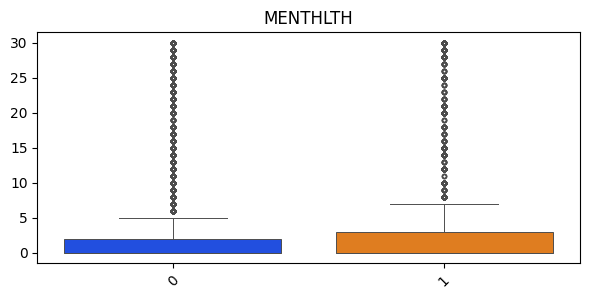

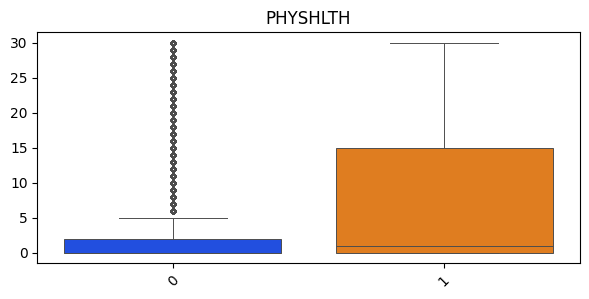

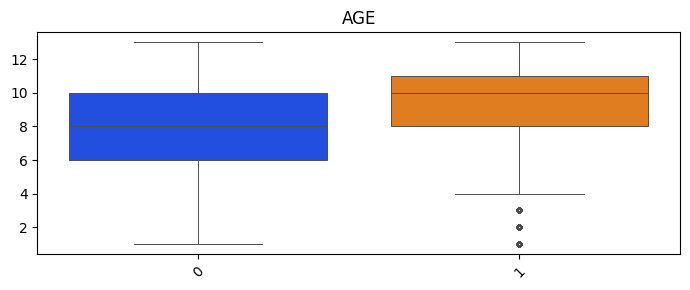

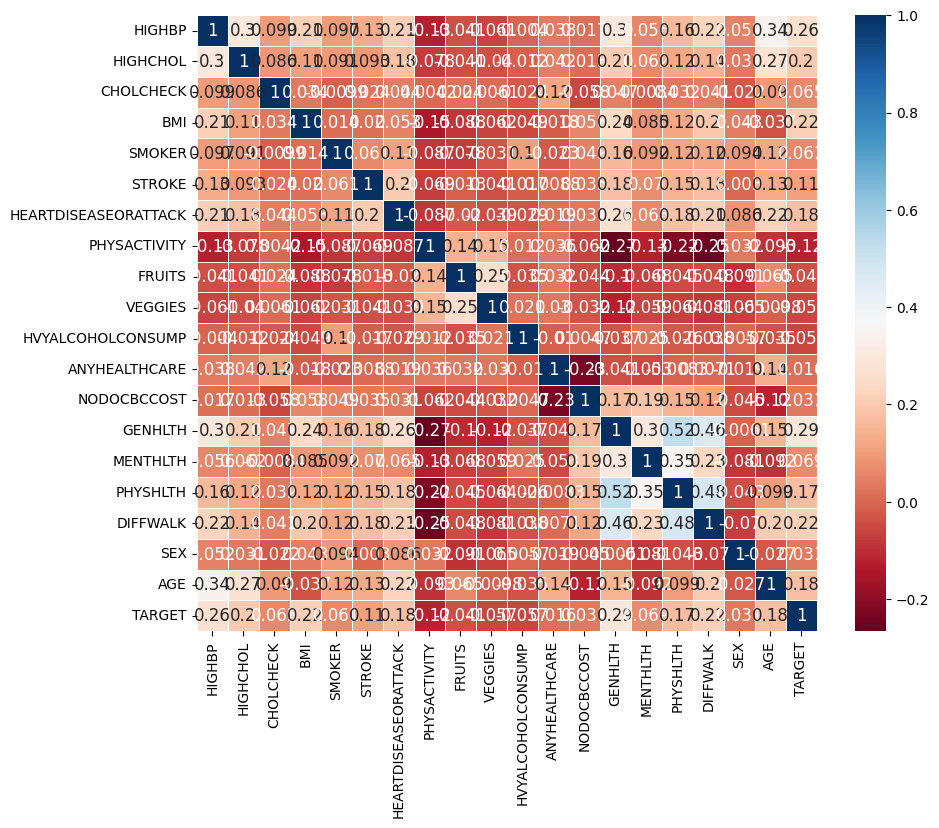

In [13]:
utils.analyse_dataset(diabetes)
cat_cols, num_cols = utils.grab_dataset(diabetes)
print("########## Cat Cols ##########")
print(cat_cols)
print("########## Num Cols ##########")
print(num_cols)
for i in num_cols:
    print(f"{i} cols threshold values : {utils.outlier_thresholds(diabetes,i)}")
for i in num_cols:
    print(f"{i} cols threshold values : {utils.check_outlier(diabetes,i)}")
for i in num_cols:
    print(f"{i} cols threshold values : {utils.grab_outliers(diabetes,i, index = True)}")
for i in num_cols:
    print(f"{i} cols threshold values : {utils.check_outlier(diabetes,i)}")
for i in num_cols:
    utils.num_summary(diabetes, i)
utils.numcols_target_corr(diabetes, num_cols)
utils.numeric_variables_boxplot(diabetes, num_cols, target = cnf.target )
utils.correlation_matrix(diabetes, diabetes.columns)

In [14]:
diabetes.columns

Index(['HIGHBP', 'HIGHCHOL', 'CHOLCHECK', 'BMI', 'SMOKER', 'STROKE',
       'HEARTDISEASEORATTACK', 'PHYSACTIVITY', 'FRUITS', 'VEGGIES',
       'HVYALCOHOLCONSUMP', 'ANYHEALTHCARE', 'NODOCBCCOST', 'GENHLTH',
       'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 'SEX', 'AGE', 'TARGET'],
      dtype='object')

In [15]:
y = diabetes['TARGET']
data = diabetes.drop(columns = ['TARGET'], axis = 1)
X= data
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns = data.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
utils.hyperparameter_optimization(X_train, y_train)


Hyperparameter Optimization....
########## XGBoost ##########
roc_auc (Before): 0.8221
roc_auc (After): 0.828
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 70, 'num_class': 8, 'objective': 'multi:softmax'}

########## LightGBM ##########
roc_auc (Before): 0.827
roc_auc (After): 0.8276
LightGBM best params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 500}



{'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.5, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=70,
               n_jobs=None, num_class=8, num_parallel_tree=None, ...),
 'LightGBM': LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, n_estimators=500,
                verbose=-1)}

In [21]:
from xgboost import XGBClassifier
model = XGBClassifier().fit(X_train, y_train)
pickle.dump(model, open("diabetes.pkl", "wb"))

In [10]:
thyroid.drop(columns=["UNNAMED:_0"], axis = 1, inplace = True)

In [11]:
utils.analyse_dataset(thyroid)
cat_cols, num_cols = utils.grab_dataset(thyroid)
thyroid.replace('?', np.nan, inplace=True)
thyroid.replace('f', 0, inplace = True)
thyroid.replace('t', 1, inplace = True)
thyroid.replace('F', 0, inplace = True)
thyroid.replace('M', 1, inplace = True)
thyroid.replace('P', 1, inplace = True)
thyroid.replace('N', 0, inplace = True)
print("########## Cat Cols ##########")
print(cat_cols)
print("########## Num Cols ##########")
print(num_cols)
for i in num_cols:
    print(f"{i} cols threshold values : {utils.outlier_thresholds(thyroid,i)}")
for i in num_cols:
    print(f"{i} cols threshold values : {utils.check_outlier(thyroid,i)}")
for i in num_cols:
    print(f"{i} cols threshold values : {utils.grab_outliers(thyroid,i, index = True)}")
for i in num_cols:
    print(f"{i} cols threshold values : {utils.check_outlier(thyroid,i)}")


########## SHAPE ##########
(3772, 21)
########## DTYPES ##########
AGE                          object
SEX                          object
ON_THYROXINE                 object
QUERY_ON_THYROXINE           object
ON_ANTITHYROID_MEDICATION    object
SICK                         object
PREGNANT                     object
THYROID_SURGERY              object
I131_TREATMENT               object
QUERY_HYPOTHYROID            object
QUERY_HYPERTHYROID           object
LITHIUM                      object
GOITRE                       object
HYPOPITUITARY                object
PSYCH                        object
TSH                          object
T3                           object
TT4                          object
T4U                          object
REFERRAL_SOURCE              object
TARGET                       object
dtype: object
########## HEAD ##########
  AGE SEX ON_THYROXINE QUERY_ON_THYROXINE ON_ANTITHYROID_MEDICATION SICK  \
0  41   F            f                  f                  

C:\Users\s7522\AppData\Local\Temp\ipykernel_17588\3108802821.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid.replace('t', 1, inplace = True)
C:\Users\s7522\AppData\Local\Temp\ipykernel_17588\3108802821.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid.replace('M', 1, inplace = True)
C:\Users\s7522\AppData\Local\Temp\ipykernel_17588\3108802821.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_o

In [12]:
for col in thyroid.columns:
    print(thyroid[col].value_counts())

AGE
59     95
60     91
70     90
73     81
55     81
       ..
10      1
4       1
5       1
455     1
6       1
Name: count, Length: 93, dtype: int64
SEX
0.0    2480
1.0    1142
Name: count, dtype: int64
ON_THYROXINE
0    3308
1     464
Name: count, dtype: int64
QUERY_ON_THYROXINE
0    3722
1      50
Name: count, dtype: int64
ON_ANTITHYROID_MEDICATION
0    3729
1      43
Name: count, dtype: int64
SICK
0    3625
1     147
Name: count, dtype: int64
PREGNANT
0    3719
1      53
Name: count, dtype: int64
THYROID_SURGERY
0    3719
1      53
Name: count, dtype: int64
I131_TREATMENT
0    3713
1      59
Name: count, dtype: int64
QUERY_HYPOTHYROID
0    3538
1     234
Name: count, dtype: int64
QUERY_HYPERTHYROID
0    3535
1     237
Name: count, dtype: int64
LITHIUM
0    3754
1      18
Name: count, dtype: int64
GOITRE
0    3738
1      34
Name: count, dtype: int64
HYPOPITUITARY
0    3771
1       1
Name: count, dtype: int64
PSYCH
0    3588
1     184
Name: count, dtype: int64
TSH
0.2     116
1.3  

In [13]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
thyroid_encoded = encoder.fit_transform(thyroid[['REFERRAL_SOURCE']])
thyroid['REFERRAL_SOURCE'] = thyroid_encoded


In [14]:
thyroid

,AGE,SEX,ON_THYROXINE,QUERY_ON_THYROXINE,ON_ANTITHYROID_MEDICATION,SICK,PREGNANT,THYROID_SURGERY,I131_TREATMENT,QUERY_HYPOTHYROID,...,LITHIUM,GOITRE,HYPOPITUITARY,PSYCH,TSH,T3,TT4,T4U,REFERRAL_SOURCE,TARGET
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.3,2.5,125,1.14,1.0,1
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.1,2,102,NaN,4.0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,NaN,109,0.91,4.0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175,NaN,4.0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61,0.87,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,4.0,1
3768,68,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2.1,124,1.08,3.0,1
3769,74,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.1,1.8,112,1.07,4.0,1
3770,72,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.7,2,82,0.94,3.0,1


<Figure size 640x480 with 0 Axes>

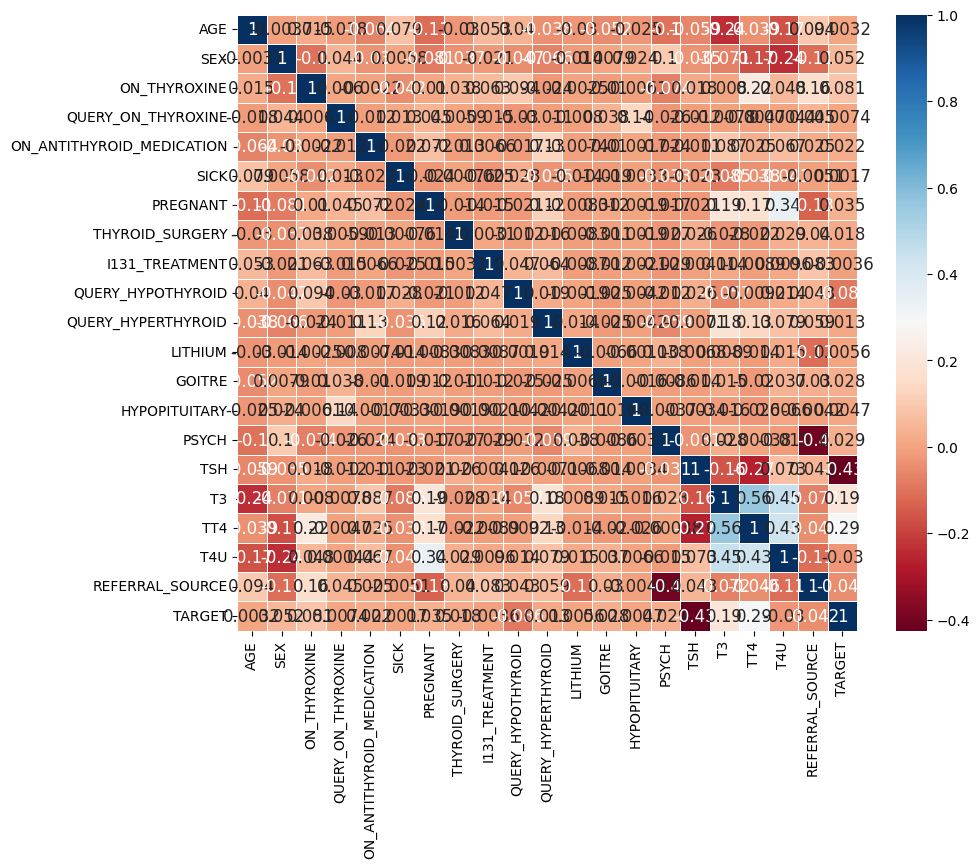

In [15]:
from xgboost import XGBClassifier
thyroid.replace('?', np.nan, inplace=True)
# '?' olan değerleri NaN olarak değiştirme
thyroid.replace('?', pd.NA, inplace=True)
# NaN değerleri float NaN değerine dönüştürme
thyroid.replace(pd.NA, float('nan'), inplace=True)
for i in num_cols:
    utils.num_summary(thyroid, i)
utils.numcols_target_corr(thyroid, num_cols)
utils.numeric_variables_boxplot(thyroid, num_cols, target=cnf.target)
utils.correlation_matrix(thyroid, thyroid.columns)
y = thyroid['TARGET']
data = thyroid.drop(columns=['TARGET'], axis=1)
# Eksik değerleri temizleme
#data.dropna(inplace=True)
X = data
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=data.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#utils.hyperparameter_optimization(X_train, y_train)
model = XGBClassifier().fit(X_train, y_train)
pickle.dump(model, open("thyroid.pkl", "wb"))
